In [60]:
# importing all the required libraries

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc


In [61]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [62]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [63]:
data = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
data = data.assign(target=pd.Series(cancer.target))
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [77]:
data.shape

(569, 31)

In [65]:
## Independent features and dependent features
X=data.iloc[:,:-1]  
y=data.iloc[:,-1]

In [66]:
## train test split 
from sklearn.model_selection import train_test_split

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [78]:
X_train.shape

(426, 30)

In [79]:
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier(max_depth=2)

In [80]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(418.5, 453.0, 'X[27] <= 0.142\ngini = 0.465\nsamples = 426\nvalue = [157, 269]'),
 Text(209.25, 271.8, 'X[23] <= 957.45\ngini = 0.155\nsamples = 284\nvalue = [24, 260]'),
 Text(104.625, 90.59999999999997, 'gini = 0.072\nsamples = 267\nvalue = [10, 257]'),
 Text(313.875, 90.59999999999997, 'gini = 0.291\nsamples = 17\nvalue = [14, 3]'),
 Text(627.75, 271.8, 'X[12] <= 1.54\ngini = 0.119\nsamples = 142\nvalue = [133, 9]'),
 Text(523.125, 90.59999999999997, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(732.375, 90.59999999999997, 'gini = 0.07\nsamples = 137\nvalue = [132, 5]')]

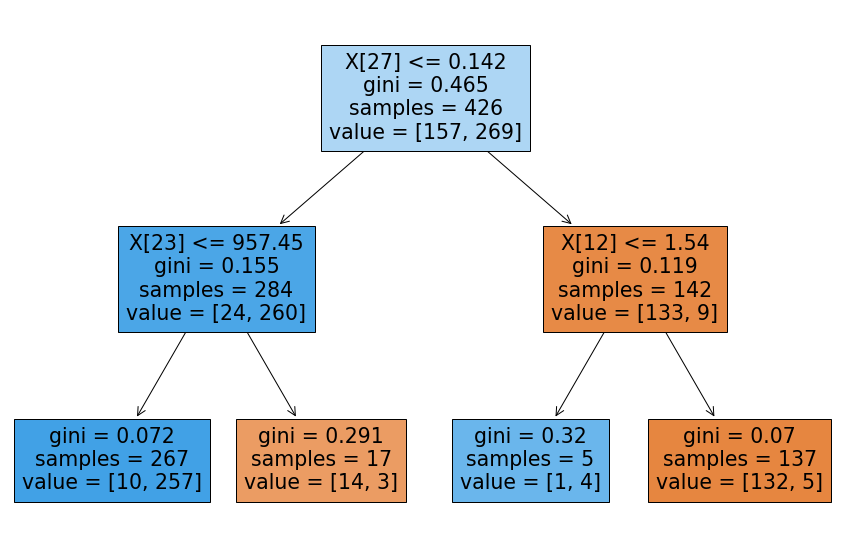

In [81]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [82]:
#prediction
y_pred=treemodel.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score,classification_report

In [84]:
score=accuracy_score(y_pred,y_test)
print(score)

0.951048951048951


In [ ]:
# 0.9370629370629371  -- Prev  Before Post Prunnig
# 0.951048951048951   -- After Post Prunning ( max_depth = 2)

In [36]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

